In [1]:
#Disable autosave
%autosave 0

Autosave disabled


In [2]:
#Import dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Acquire

In [3]:
#Read in the data
df = pd.read_csv('merged_df.csv', index_col='Unnamed: 0')
df.head()

,sale_amount,sale_date,item_brand,item_name,item_price,store_address,store_city,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


## Summarize

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_date      913000 non-null  object 
 2   item_brand     913000 non-null  object 
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   store_address  913000 non-null  object 
 6   store_city     913000 non-null  object 
 7   store_state    913000 non-null  object 
 8   store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 69.7+ MB


In [5]:
df.shape

(913000, 9)

In [6]:
df.item_name.nunique()

50

In [7]:
df.store_city.nunique()

1

In [8]:
df.item_brand.nunique()

49

## Prepare

In [9]:
#Change the sale_date column to datetime format
df['sale_date'] = pd.to_datetime(df['sale_date'], infer_datetime_format=True)
df.head()

,sale_amount,sale_date,item_brand,item_name,item_price,store_address,store_city,store_state,store_zipcode
0,13.0,2013-01-01,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,11.0,2013-01-02,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,14.0,2013-01-03,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,13.0,2013-01-04,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,10.0,2013-01-05,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [10]:
#Set the sale_date column as the index
df.set_index('sale_date', inplace=True)
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,
2013-01-01,13.0,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-02,11.0,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-03,14.0,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-04,13.0,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-05,10.0,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [11]:
#Sort the index
df.sort_index(inplace=True)
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,
2013-01-01,13.0,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01,26.0,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01,27.0,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01,54.0,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,San Antonio,TX,78232
2013-01-01,35.0,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,San Antonio,TX,78221


In [12]:
df.index.min()

Timestamp('2013-01-01 00:00:00')

In [13]:
df.index.max()

Timestamp('2017-12-31 00:00:00')

In [14]:
df.index.max() - df.index.min()

Timedelta('1825 days 00:00:00')

In [15]:
1825 / 365

5.0

## Explore

In [16]:
#Group by sale date and take the sum of all sales
sale_sum = df.groupby('sale_date').sale_amount.sum()
sale_sum.head()

sale_date
2013-01-01    13696.0
2013-01-02    13678.0
2013-01-03    14488.0
2013-01-04    15677.0
2013-01-05    16237.0
Name: sale_amount, dtype: float64

<AxesSubplot:xlabel='sale_date'>

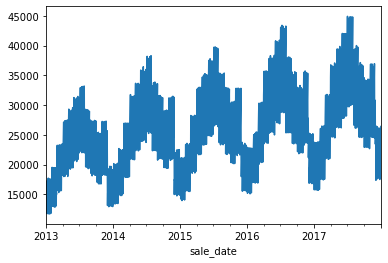

In [17]:
#Plot my data
sale_sum.plot(x='sale_date', y='sale_amount')

<AxesSubplot:xlabel='sale_date'>

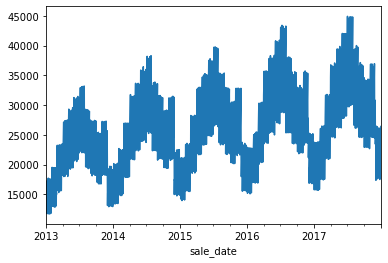

In [18]:
#Alternate method to achieve the same plot
df.resample('D').sale_amount.sum().plot()

<AxesSubplot:xlabel='sale_date'>

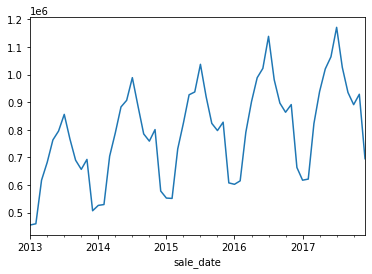

In [19]:
#Can we resample by month to reduce the amount of noise?
df.resample('M').sale_amount.sum().plot()

In [20]:
#What about by year?
df.resample('Y').sale_amount.sum()

sale_date
2013-12-31     7941243.0
2014-12-31     9135482.0
2015-12-31     9536887.0
2016-12-31    10357160.0
2017-12-31    10733740.0
Freq: A-DEC, Name: sale_amount, dtype: float64

<AxesSubplot:xlabel='sale_date'>

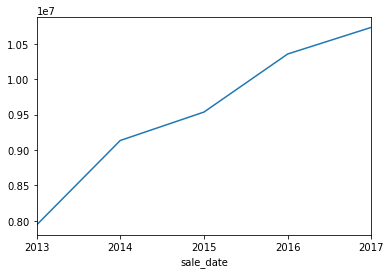

In [21]:
#What did we lose in this chart?
df.resample('Y').sale_amount.sum().plot()